In [1]:
import sys 
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..") 

In [2]:
from cellotype.predict import CelloTypePredictor

## Load the image

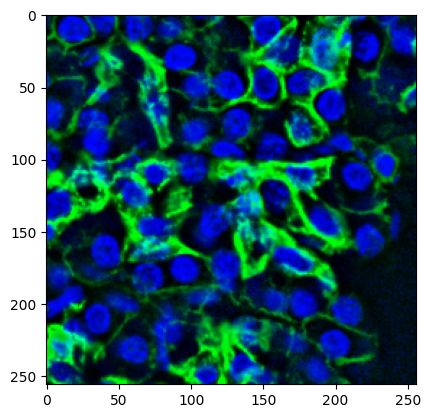

In [3]:
img = io.imread('../data/example/example_tissuenet.png')
plt.imshow(img)

## Load the pretrained model and make predictions

In [ ]:
model = CelloTypePredictor('../cellotype/models/tissuenet_model_0019999.pth',confidence_thresh=0.3, max_det=1000, device='cuda', 
                           config_path='../cellotype/configs/maskdino_R50_bs16_50ep_4s_dowsample1_2048.yaml')

In [5]:
mask = model.predict(img)

## Visualize the results using DeepCell library

In [6]:
from deepcell.utils.plot_utils import create_rgb_image
from deepcell.utils.plot_utils import make_outline_overlay

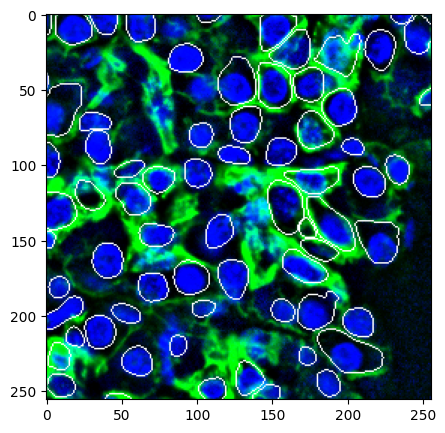

In [7]:
img_data = img[:,:,[2,1]]
img_data = np.reshape(img_data, (1, img_data.shape[0], img_data.shape[1], 2))
rgb_image = create_rgb_image(img_data, channel_colors=['blue', 'green'])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(make_outline_overlay(rgb_image, predictions=np.reshape(mask, (1, mask.shape[0], mask.shape[1], 1)))[0])